In [1]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import ruptures as rpt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Loading csvs

In [2]:
snp_3_sigma = pd.read_csv('results/snp_3_sigma.csv', index_col='Date')
snp_anomalies = pd.read_csv('results/snp_anomalies.csv', index_col='Date')
snp_outliers_tech = pd.read_csv('results/snp_outliers_tech.csv', index_col='Date')
snp_change_points_mean = pd.read_csv('results/snp_change_points_mean.csv', index_col='Date')
snp_pelt = pd.read_csv('results/snp_pelt.csv', index_col='Date')

moex_3_sigma = pd.read_csv('results/moex_3_sigma.csv', index_col='Date')
moex_anomalies = pd.read_csv('results/moex_anomalies.csv', index_col='Date')
moex_outliers_tech = pd.read_csv('results/moex_outliers_tech.csv', index_col='Date')
moex_change_points_mean = pd.read_csv('results/moex_change_points_mean.csv', index_col='Date')
moex_pelt = pd.read_csv('results/moex_pelt.csv', index_col='Date')

In [3]:
print(len(snp_3_sigma), len(snp_anomalies), len(snp_outliers_tech), len(snp_pelt))

2568 2568 2568 2568


# Indeces

In [4]:
start_date = '2014-12-30'
end_date = '2022-01-09'
method = "Adj Close"
index_name = ['^GSPC', 'IMOEX.ME']

In [5]:
def get_index_data(start_date, end_date, method=method, i=0):
    spx_index = DataReader(index_name[i], 'yahoo', start_date, end_date)[method]
    spx_returns = spx_index.pct_change().dropna()
    return spx_index, spx_returns

In [6]:
spx_idx, spx_returns = get_index_data(start_date, end_date, method=method, i=0)
moex_idx, moex_returns = get_index_data(start_date, end_date, method=method, i=1)

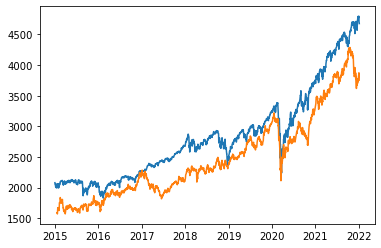

In [7]:
fig = plt.figure()
ax = plt.axes()

ax.plot(spx_idx)
ax.plot(moex_idx)

## Working on anomalies files

### spx

In [8]:
anomalies = snp_anomalies.copy()
anomalies = anomalies.drop(anomalies.iloc[:, 12:len(anomalies.columns)], axis=1)
anomalies['result'] = anomalies.T.sum()

In [9]:
anomalies.head()

,within_2_5_days,signif_2_5_days,after_5days,within_2_10_days,signif_2_10_days,after_10days,within_2_15_days,signif_2_15_days,after_15days,within_2_20_days,signif_2_20_days,after_20days,result
Date,,,,,,,,,,,,,
12/30/2014,0,0,0,0,0,0,0,0,0,0,0,0,0
12/31/2014,0,0,0,0,0,0,0,0,0,0,0,0,0
1/1/2015,0,0,0,0,0,0,0,0,0,0,0,0,0
1/2/2015,0,0,0,0,0,0,0,0,0,0,0,0,0
1/3/2015,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

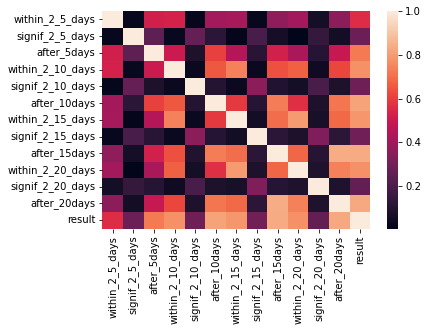

In [10]:
sns.heatmap(anomalies.corr())

In [11]:
anomalies[anomalies['result'] >= 6][anomalies['result'] <= 7]['result'].count()

C:\Users\xrosn\AppData\Local\Temp\ipykernel_6764\824629281.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anomalies[anomalies['result'] >= 6][anomalies['result'] <= 7]['result'].count()


81

In [12]:
anomalies_final = anomalies['result'].copy
"""
for anom in anomalies_final:
    if anom <= 5:
        anom = 0
    else:
        anom = 1
"""
anomalies_final
# anomalies_final['result'].rename('anom_6')

<bound method NDFrame.copy of Date
12/30/2014     0
12/31/2014     0
1/1/2015       0
1/2/2015       0
1/3/2015       0
1/4/2015       0
1/5/2015       0
1/6/2015       0
1/7/2015       0
1/8/2015       2
1/9/2015       0
1/10/2015      0
1/11/2015      0
1/12/2015      0
1/13/2015      0
1/14/2015      0
1/15/2015      0
1/16/2015      2
1/17/2015      0
1/18/2015      0
1/19/2015      0
1/20/2015      2
1/21/2015      0
1/22/2015      0
1/23/2015      0
1/24/2015      0
1/25/2015      0
1/26/2015      0
1/27/2015      0
1/28/2015      2
1/29/2015      0
1/30/2015      0
1/31/2015      0
2/1/2015       0
2/2/2015       1
2/3/2015       0
2/4/2015       0
2/5/2015       0
2/6/2015       0
2/7/2015       0
2/8/2015       0
2/9/2015       0
2/10/2015      0
2/11/2015      0
2/12/2015      0
2/13/2015      0
2/14/2015      0
2/15/2015      0
2/16/2015      0
2/17/2015      0
2/18/2015      0
2/19/2015      0
2/20/2015      1
2/21/2015      0
2/22/2015      0
2/23/2015      0
2/24/2015    

#### Change parameters

In [109]:
# CHANGE PARAMETER HERE 

# anomalies
anom_low = 5
anom_high = 7
all_param = 1

# cp
all_param_cp = 1

In [110]:
# taking result column with values greater than 6
anomalies_more6 = anomalies['result'].copy()
anomalies_more6[anomalies['result'] < anom_low] = 0 # CHANGE PARAMETER HERE 
# anomalies_more6[anomalies['result'] >= 8] = 0
anomalies_more6[anomalies_more6 > 0] = 1

# taking result column with values greater than 8
anomalies_more8 = anomalies['result'].copy()
anomalies_more8[anomalies['result'] < anom_high] = 0 # CHANGE PARAMETER HERE 
anomalies_more8[anomalies_more8 > 0] = 1

# concatination of anomalies
anomalies_final = pd.DataFrame(anomalies_more6)
anomalies_final = anomalies_final.rename(columns={'result': 'anomalies_more6'})
anomalies_final['anomalies_more8'] = anomalies_more8
# anomalies_final['result'].rename('anom_6')

In [111]:
anomalies_final.head()

,anomalies_more6,anomalies_more8
Date,,
12/30/2014,0,0
12/31/2014,0,0
1/1/2015,0,0
1/2/2015,0,0
1/3/2015,0,0


In [112]:
"""
# If there is no name for index (had to correct files by hand)

snp = pd.concat([snp_3_sigma, snp_anomalies, snp_outliers_tech, snp_pelt], axis=1)
snp = snp.rename(columns={snp.columns[0]: "Date"})
idx = snp.iloc[:,0]
snp = snp.set_index('Date')
snp = snp.reset_index(drop=True)
snp = snp.set_index(idx)
"""

'\n# If there is no name for index (had to correct files by hand)\n\nsnp = pd.concat([snp_3_sigma, snp_anomalies, snp_outliers_tech, snp_pelt], axis=1)\nsnp = snp.rename(columns={snp.columns[0]: "Date"})\nidx = snp.iloc[:,0]\nsnp = snp.set_index(\'Date\')\nsnp = snp.reset_index(drop=True)\nsnp = snp.set_index(idx)\n'

In [113]:
# evaluating results spx
snp = pd.concat([snp_3_sigma, anomalies_final, snp_outliers_tech], axis=1)
snp['result'] = snp.T.sum()
number_of_anomalies_snp = snp[snp['result'] > all_param]['result'].count() # CHANGE PARAMETER HERE 

In [114]:
# final indices spx
anomalies_snp_indices = snp[snp['result'] > all_param].index # CHANGE PARAMETER HERE 
anomalies_snp = anomalies_snp_indices.tolist()

#### change points

In [115]:
snp_potential_change_points = pd.concat([snp_change_points_mean, snp_pelt], axis=1)
# snp_potential_change_points = snp_pelt
# snp_potential_change_points = snp_change_points_mean
snp_potential_change_points['result'] = snp_potential_change_points.T.sum()
number_of_cp_snp = snp_potential_change_points[snp_potential_change_points['result'] > all_param_cp]['result'].count() # CHANGE PARAMETER HERE

In [116]:
# snp_potential_change_points['result'][snp_potential_change_points['result'] > 1]

In [117]:
change_points_snp_indices = snp_potential_change_points[snp_potential_change_points['result'] > all_param_cp].index
change_points_snp = change_points_snp_indices.tolist()

In [118]:
# snp_potential_change_points.

### moex

#### anomalies

In [119]:
anomalies_moex = moex_anomalies.copy()
anomalies_moex = anomalies_moex.drop(anomalies_moex.iloc[:, 12:len(anomalies_moex.columns)], axis=1)
anomalies_moex['result'] = anomalies_moex.T.sum()
anomalies_final_moex = anomalies_moex['result'].copy
anomalies_more6_moex = anomalies_moex['result'].copy()

In [120]:
# taking result column with values greater than 6
anomalies_more6_moex[anomalies_moex['result'] < anom_low] = 0 # CHANGE PARAMETER HERE 
# anomalies_more6[anomalies['result'] >= anom_high] = 0 # CHANGE PARAMETER HERE 
anomalies_more6_moex[anomalies_more6_moex > 0] = 1

# taking result column with values greater than 8
anomalies_more8_moex = anomalies_moex['result'].copy()
anomalies_more8_moex[anomalies_moex['result'] < anom_high] = 0 # CHANGE PARAMETER HERE 
anomalies_more8_moex[anomalies_more8_moex > 0] = 1

# concatination of anomalies
anomalies_final_moex = pd.DataFrame(anomalies_more6_moex)
anomalies_final_moex = anomalies_final_moex.rename(columns={'result': 'anomalies_more6'})
anomalies_final_moex['anomalies_more8'] = anomalies_more8_moex
# anomalies_final['result'].rename('anom_6')

In [121]:
# evaluating results moex
moex = pd.concat([moex_3_sigma, anomalies_final_moex, moex_outliers_tech], axis=1)
moex['result'] = moex.T.sum()
number_of_anomalies_moex = moex[moex['result'] > all_param]['result'].count() # CHANGE PARAMETER HERE 

In [122]:
# moex_anomalies

In [123]:
# moex

In [124]:
# final indices moex
anomalies_moex_indices = moex[moex['result'] > all_param].index # CHANGE PARAMETER HERE 
anomalies_moex = anomalies_moex_indices.tolist()

#### change points

In [125]:
moex_potential_change_points = pd.concat([moex_change_points_mean, moex_pelt], axis=1)
# moex_potential_change_points = moex_pelt
# moex_potential_change_points = moex_change_points_mean
moex_potential_change_points['result'] = moex_potential_change_points.T.sum()
number_of_cp_moex = moex_potential_change_points[moex_potential_change_points['result'] > all_param_cp]['result'].count() # CHANGE PARAMETER HERE 

In [126]:
# moex_potential_change_points['result'][moex_potential_change_points['result'] > 1]

In [127]:
change_points_moex_indices = moex_potential_change_points[moex_potential_change_points['result'] > all_param_cp].index
change_points_moex = change_points_moex_indices.tolist()

# Drawing

In [128]:
idx = pd.date_range(start_date, end_date)

### moex points for ruptures figure 

(it requires indices of points and moex trend)

In [129]:
anomalies_moex_target = moex.copy()
anomalies_moex_target = anomalies_moex_target.drop(anomalies_moex_target.iloc[:, 1:len(anomalies_moex_target.columns)], axis=1)
anomalies_moex_target['3_sigma'] = 0
anomalies_moex_target = anomalies_moex_target.rename(columns={'3_sigma': 'anomaly_point'})
anomalies_moex_target.loc[anomalies_moex, 'anomaly_point'] = 1

In [130]:
# moex_anomalies_points = moex_idx[anomalies_moex_indices]
moex_idx_copy_anom = moex_idx.copy()
moex_idx_copy_anom[anomalies_moex_indices] = 1
for i in range(len(moex_idx_copy_anom)):
    if moex_idx_copy_anom[i] != 1:
        moex_idx_copy_anom[i] = 0
moex_anomalies_points_index = np.array(moex_idx)
moex_idx_copy_anom = moex_idx_copy_anom.reset_index(drop=True)
moex_idx_copy_anom = moex_idx_copy_anom[moex_idx_copy_anom == 1]
moex_anomalies_points = moex_idx_copy_anom.reset_index(drop=False)['index']
moex_anomalies_points = np.array(moex_anomalies_points)

In [131]:
change_points_moex_target = moex_potential_change_points.copy()
change_points_moex_target = change_points_moex_target.drop(change_points_moex_target.iloc[:, 1:len(change_points_moex_target.columns)], axis=1)
change_points_moex_target['5 days CP'] = 0
change_points_moex_target = change_points_moex_target.rename(columns={'5 days CP': 'change_point'})
change_points_moex_target.loc[change_points_moex, 'change_point'] = 1

In [132]:
moex_idx_copy_cp = moex_idx.copy()
moex_idx_copy_cp[change_points_moex_indices] = 1
for i in range(len(moex_idx_copy_cp)):
    if moex_idx_copy_cp[i] != 1:
        moex_idx_copy_cp[i] = 0
moex_change_points_points_index = np.array(moex_idx)
moex_idx_copy_cp = moex_idx_copy_cp.reset_index(drop=True)
moex_idx_copy_cp = moex_idx_copy_cp[moex_idx_copy_cp == 1]
moex_change_points_points = moex_idx_copy_cp.reset_index(drop=False)['index']
moex_change_points_points = np.array(moex_change_points_points)

### snp points for ruptures figure

In [133]:
anomalies_snp_target = snp.copy()
anomalies_snp_target = anomalies_snp_target.drop(anomalies_snp_target.iloc[:, 1:len(anomalies_snp_target.columns)], axis=1)
anomalies_snp_target['3_sigma'] = 0
anomalies_snp_target = anomalies_snp_target.rename(columns={'3_sigma': 'anomaly_point'})
anomalies_snp_target.loc[anomalies_snp, 'anomaly_point'] = 1

In [134]:
snp_idx_copy = spx_idx.copy()
snp_idx_copy[anomalies_snp_indices] = 1
for i in range(len(snp_idx_copy)):
    if snp_idx_copy[i] != 1:
        snp_idx_copy[i] = 0
snp_anomalies_points_index = np.array(spx_idx)
snp_idx_copy = snp_idx_copy.reset_index(drop=True)
snp_idx_copy = snp_idx_copy[snp_idx_copy == 1]
snp_anomalies_points = snp_idx_copy.reset_index(drop=False)['index']
snp_anomalies_points = np.array(snp_anomalies_points)

In [135]:
change_points_snp_target = snp_potential_change_points.copy()
change_points_snp_target = change_points_snp_target.drop(change_points_snp_target.iloc[:, 1:len(change_points_snp_target.columns)], axis=1)
change_points_snp_target['5 days CP'] = 0
change_points_snp_target = change_points_snp_target.rename(columns={'5 days CP': 'change_point'})
change_points_snp_target.loc[change_points_snp, 'change_point'] = 1

In [136]:
snp_idx_copy_cp = spx_idx.copy()
snp_idx_copy_cp[change_points_snp_indices] = 1
for i in range(len(snp_idx_copy_cp)):
    if snp_idx_copy_cp[i] != 1:
        snp_idx_copy_cp[i] = 0
snp_change_points_points_index = np.array(spx_idx)
snp_idx_copy_cp = snp_idx_copy_cp.reset_index(drop=True)
snp_idx_copy_cp = snp_idx_copy_cp[snp_idx_copy_cp == 1]
snp_change_points_points = snp_idx_copy_cp.reset_index(drop=False)['index']
snp_change_points_points = np.array(snp_change_points_points)

# Results

## MOEX Anomalies

MOEX: Number of anomalies: 90
Anomalies:['3/4/2015', '3/10/2015', '3/30/2015', '5/29/2015', '8/24/2015', '10/5/2015', '11/17/2015', '11/24/2015', '12/18/2015', '1/11/2016', '1/15/2016', '4/28/2016', '5/31/2016', '6/7/2016', '6/27/2016', '8/2/2016', '9/2/2016', '9/9/2016', '9/22/2016', '11/2/2016', '11/9/2016', '11/10/2016', '12/8/2016', '12/14/2016', '12/22/2016', '3/9/2017', '4/10/2017', '4/24/2017', '5/31/2017', '6/1/2017', '6/19/2017', '7/18/2017', '7/28/2017', '9/8/2017', '11/7/2017', '12/11/2017', '1/3/2018', '1/4/2018', '2/6/2018', '2/21/2018', '2/28/2018', '4/9/2018', '4/10/2018', '5/23/2018', '6/8/2018', '6/20/2018', '6/29/2018', '8/10/2018', '8/23/2018', '9/27/2018', '10/11/2018', '12/28/2018', '4/11/2019', '5/14/2019', '7/1/2019', '7/11/2019', '8/2/2019', '9/16/2019', '10/16/2019', '11/8/2019', '1/22/2020', '2/25/2020', '3/6/2020', '3/10/2020', '3/19/2020', '3/24/2020', '4/15/2020', '4/22/2020', '5/18/2020', '7/30/2020', '8/20/2020', '9/21/2020', '10/28/2020', '11/2/2020', '1

<AxesSubplot:xlabel='Date'>

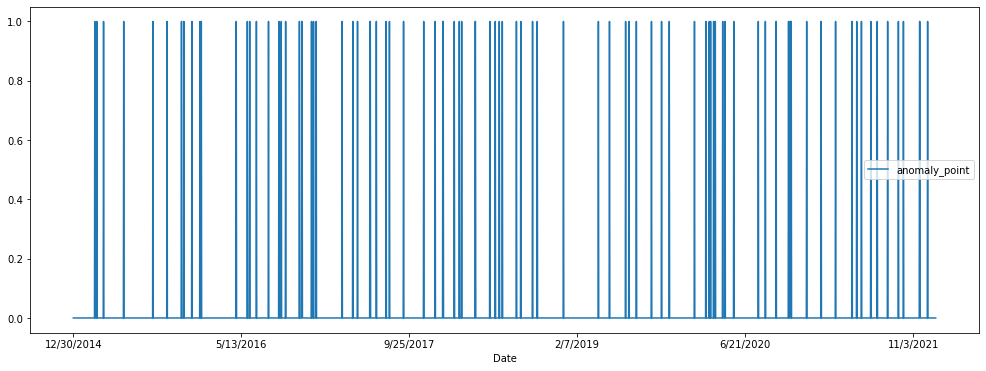

In [137]:
print(f"MOEX: Number of anomalies: {number_of_anomalies_moex}")
print(f"Anomalies:{anomalies_moex}")
anomalies_moex_target.plot(figsize=(17,6))

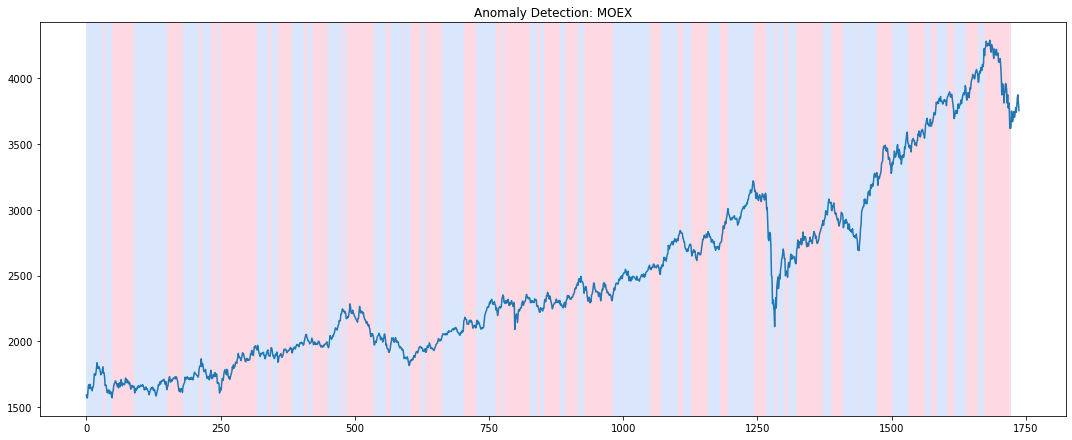

In [138]:
rpt.display(moex_anomalies_points_index, moex_anomalies_points, figsize=(15, 6))
plt.title('Anomaly Detection: MOEX')
plt.show()  

## MOEX Change Points

Number of change points: 28
Change points:['3/30/2015', '10/5/2015', '11/17/2015', '11/24/2015', '9/9/2016', '11/9/2016', '4/10/2017', '6/19/2017', '12/11/2017', '1/3/2018', '1/4/2018', '2/28/2018', '5/23/2018', '10/3/2018', '12/28/2018', '5/14/2019', '9/16/2019', '11/8/2019', '3/19/2020', '3/24/2020', '8/12/2020', '8/20/2020', '10/28/2020', '11/5/2020', '2/2/2021', '5/5/2021', '7/28/2021', '12/16/2021']


<AxesSubplot:xlabel='Date'>

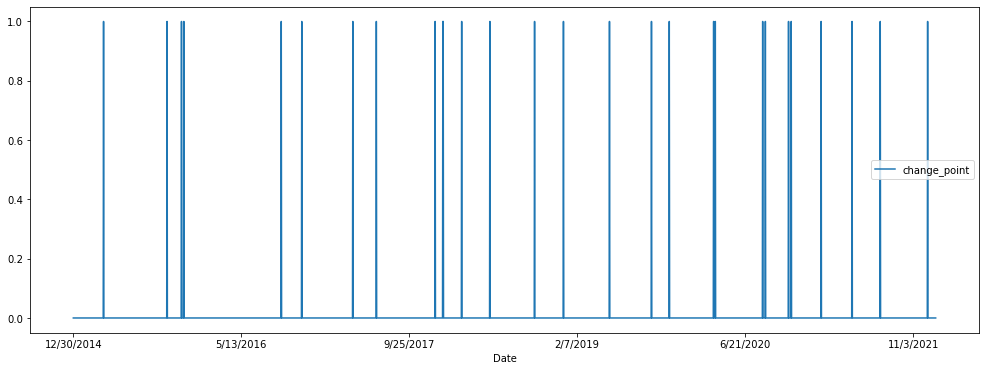

In [139]:
print(f"Number of change points: {number_of_cp_moex}")
print(f"Change points:{change_points_moex}")
change_points_moex_target.plot(figsize=(17,6))

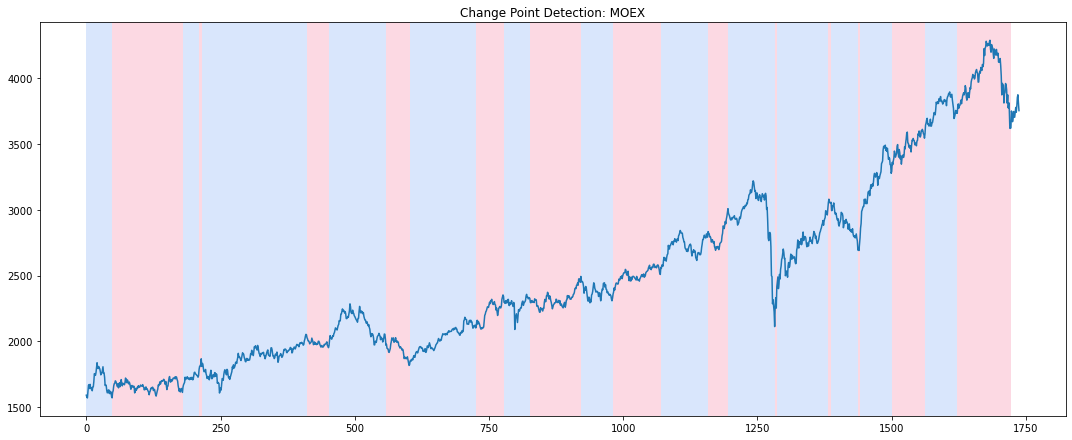

In [140]:
rpt.display(moex_change_points_points_index, moex_change_points_points, figsize=(15, 6))
plt.title('Change Point Detection: MOEX')
plt.show()  

## SNP500 Anomalies

SNP500: Number of anomalies: 106
Anomalies:['3/6/2015', '4/17/2015', '4/30/2015', '6/10/2015', '6/29/2015', '7/8/2015', '8/24/2015', '8/26/2015', '8/27/2015', '9/28/2015', '9/30/2015', '12/4/2015', '3/1/2016', '4/5/2016', '5/10/2016', '6/10/2016', '6/24/2016', '6/27/2016', '8/2/2016', '8/5/2016', '9/9/2016', '9/12/2016', '10/11/2016', '11/7/2016', '12/7/2016', '12/14/2016', '12/28/2016', '1/25/2017', '1/30/2017', '3/1/2017', '3/2/2017', '3/15/2017', '3/21/2017', '4/17/2017', '5/17/2017', '6/19/2017', '6/28/2017', '8/10/2017', '9/11/2017', '10/23/2017', '10/25/2017', '11/15/2017', '11/16/2017', '11/28/2017', '12/15/2017', '12/29/2017', '1/2/2018', '2/5/2018', '2/8/2018', '3/26/2018', '5/4/2018', '5/29/2018', '5/30/2018', '6/25/2018', '8/10/2018', '8/15/2018', '10/4/2018', '10/10/2018', '10/11/2018', '12/4/2018', '12/26/2018', '1/4/2019', '2/7/2019', '3/11/2019', '3/22/2019', '5/7/2019', '5/13/2019', '6/4/2019', '6/25/2019', '7/31/2019', '8/5/2019', '8/14/2019', '8/23/2019', '10/2/2019',

<AxesSubplot:xlabel='Date'>

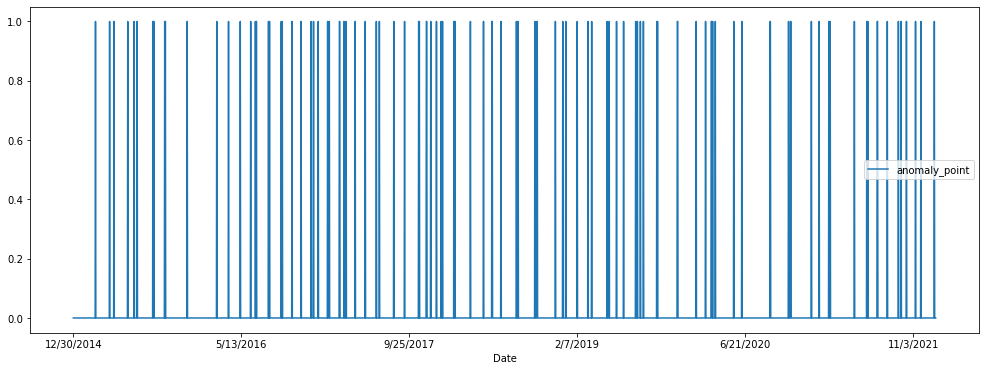

In [141]:
print(f"SNP500: Number of anomalies: {number_of_anomalies_snp}")
print(f"Anomalies:{anomalies_snp}")
anomalies_snp_target.plot(figsize=(17,6))

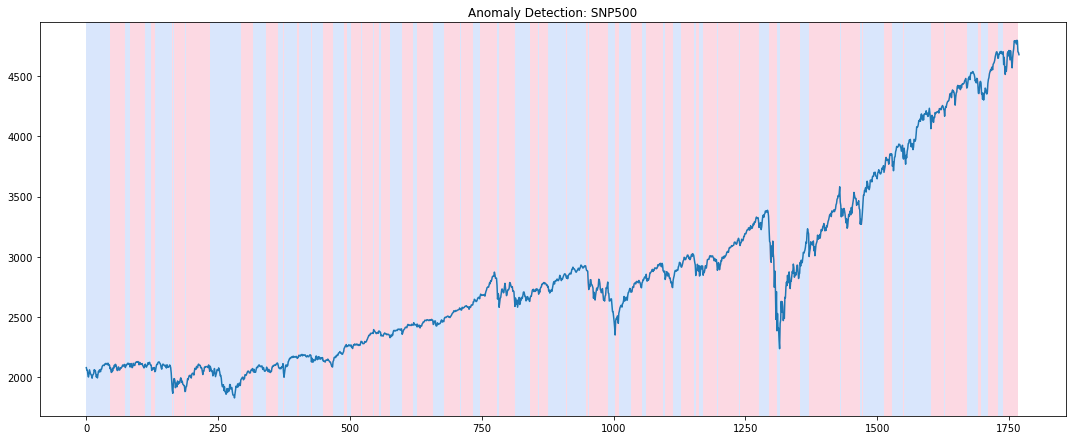

In [142]:
rpt.display(snp_anomalies_points_index, snp_anomalies_points, figsize=(15, 6))
plt.title('Anomaly Detection: SNP500')
plt.show()  

## SNP500 Change Points

Number of change points: 14
Change points:['7/29/2015', '8/26/2015', '11/7/2016', '3/1/2017', '4/17/2017', '12/26/2018', '3/11/2019', '5/7/2019', '6/4/2019', '10/4/2019', '3/24/2020', '9/3/2020', '6/21/2021', '1/5/2022']


<AxesSubplot:xlabel='Date'>

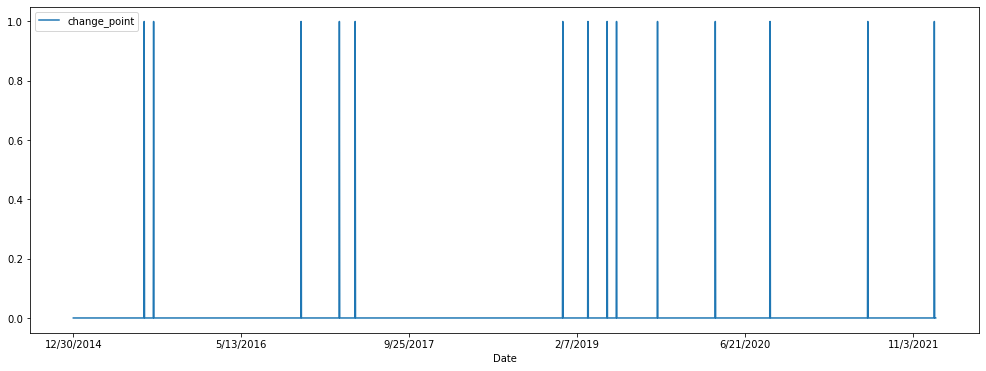

In [143]:
print(f"Number of change points: {number_of_cp_snp}")
print(f"Change points:{change_points_snp}")
change_points_snp_target.plot(figsize=(17,6))

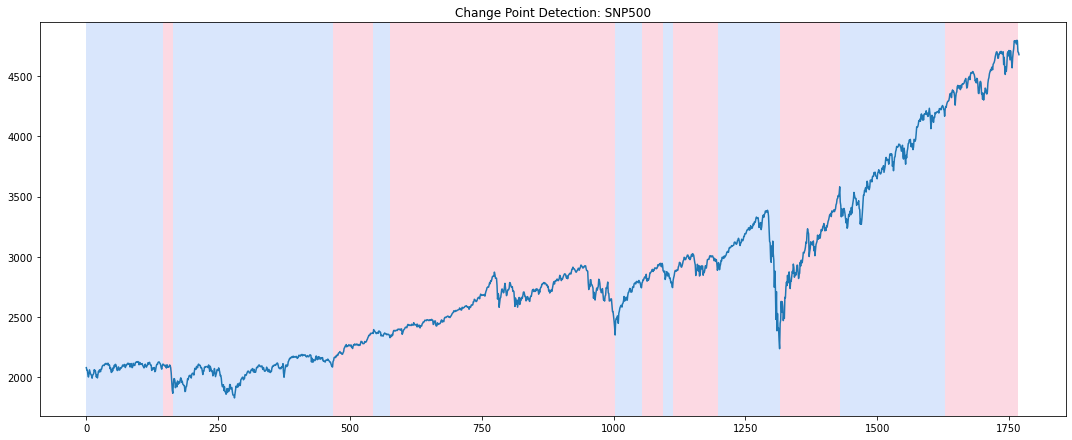

In [144]:
rpt.display(snp_change_points_points_index, snp_change_points_points, figsize=(15, 6))
plt.title('Change Point Detection: SNP500')
plt.show()  